In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:29<00:00, 40.1MB/s]
100% 1.06G/1.06G [00:29<00:00, 38.6MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout

In [18]:
#Generators
train_ds = keras.utils.image_dataset_from_directory(
 directory='/content/train' ,
 labels='inferred'  ,
 label_mode='int',
 batch_size=32,
 image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
 directory='/content/test' ,
 labels='inferred'  ,
 label_mode='int',
 batch_size=32,
 image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [19]:
#Normalize
def process(image,label):
    image=tf.cast(image/255. ,tf.float32)
    return image,label
    train_ds=train_ds.map(process)
    validation_ds=validation_ds.map(process)

In [20]:
#create CNN Model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 86ms/step - accuracy: 0.5825 - loss: 2.4667 - val_accuracy: 0.6666 - val_loss: 0.6091
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.7107 - loss: 0.5657 - val_accuracy: 0.6400 - val_loss: 0.6963
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 94ms/step - accuracy: 0.7647 - loss: 0.4944 - val_accuracy: 0.7486 - val_loss: 0.5491
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.8102 - loss: 0.4166 - val_accuracy: 0.7382 - val_loss: 0.7271
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 99ms/step - accuracy: 0.8357 - loss: 0.3734 - val_accuracy: 0.7544 - val_loss: 0.5840
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.8764 - loss: 0.2830 - val_accuracy: 0.7968 - val_loss: 0.4843
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 88ms/step - accuracy: 0.9065 - loss: 0.2195 - val_accuracy: 0.7820 - val_loss: 0.5743
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.9434 - loss: 0.1452 - 

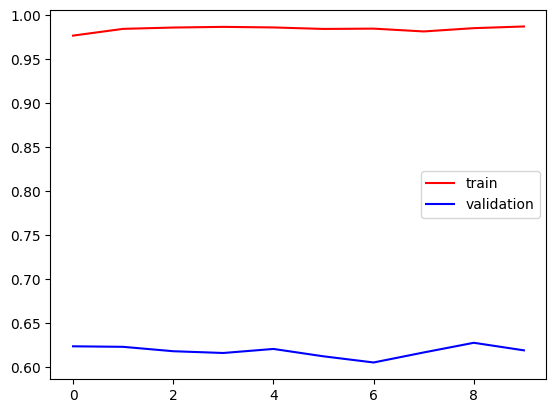

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

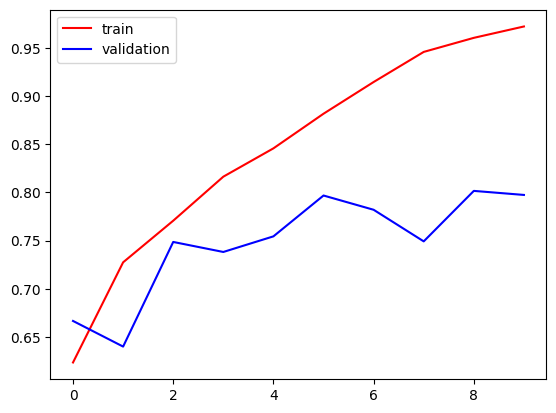

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

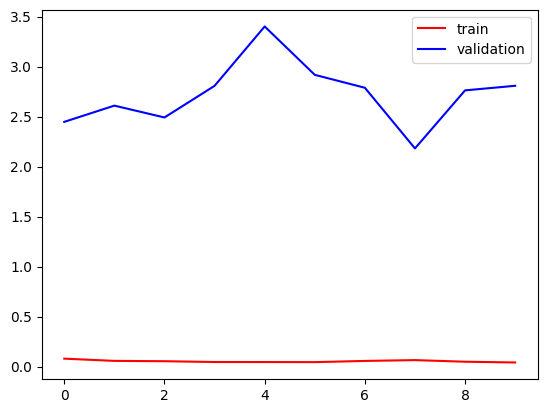

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

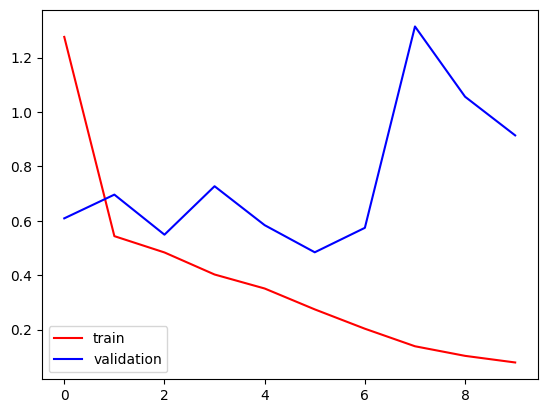

In [27]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [25]:
import cv2

In [36]:
test_image=cv2.imread('/content/european-shorthair-8601492_640.jpg')

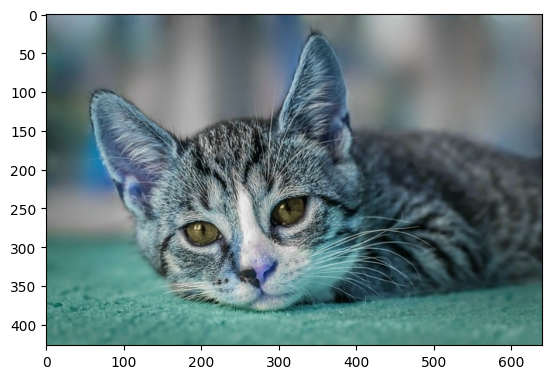

In [37]:
plt.imshow(test_image)

In [38]:
test_image.shape

(427, 640, 3)

In [39]:
#REsize
test_image=cv2.resize(test_image,(256,256))


In [40]:
test_input=test_image.reshape((1,256,256,3))

In [41]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[1.4890009e-05]], dtype=float32)

In [43]:
# For predicting on a new image:
from tensorflow.keras.preprocessing import image
import numpy as np

# Replace 'path_to_new_image.jpg' with the actual path to your image
img_path = '/content/european-shorthair-8601492_640.jpg'  # Path to a new dog or cat image
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize image

# Make a prediction (0 = dog, 1 = cat)
prediction = model.predict(img_array)

# Determine the predicted label based on the sigmoid output
if prediction[0] > 0.5:
    print("Predicted class: Cat")  # Class 1 corresponds to Cat
else:
    print("Predicted class: Dog")  # Class 0 corresponds to Dog

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
Predicted class: Cat
